<a href="https://colab.research.google.com/github/Bouza1/breast_cancer_classification/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

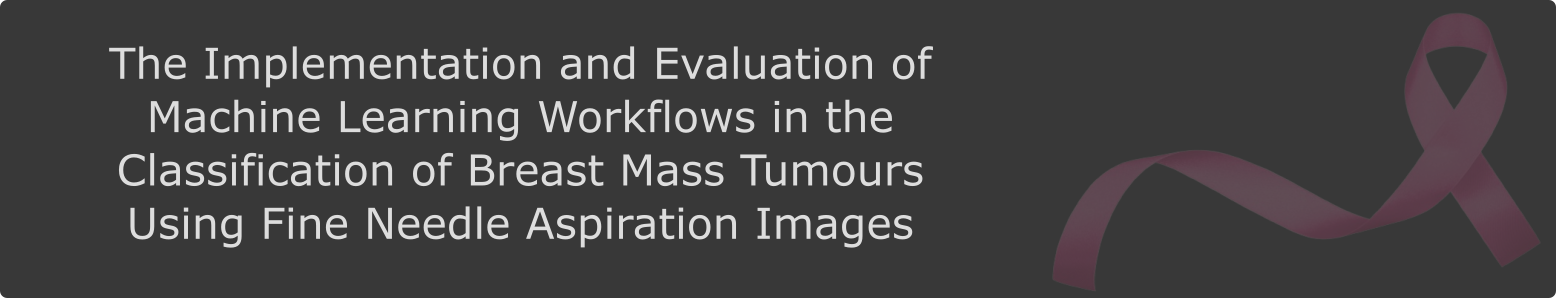

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib.patches import Patch

# Utilities

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def load_fresh_dataset():
  return pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')

In [6]:
# Visualisation Colours And Labels
colour_list = ['steelblue', 'peachpuff']
corr_colours = sns.diverging_palette(230, 20, as_cmap=True)
formatted_labels = ['Benign','Malignant']

# Dataset Exploration

In [5]:
df = load_fresh_dataset()
df.head(7)

,id,radius_mean,texture_mean,perimter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,class
0,842302.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,NaN,0.4601,0.11890,M
1,842517.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M
5,843786.0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,M
6,844359.0,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,M


## Size & Shape

In [7]:
print(f"The dataset contains {df.shape[1]} columns and {df.shape[0]} rows")

The dataset contains 32 columns and 569 rows


## Features

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       568 non-null    float64
 1   radius_mean              550 non-null    float64
 2   texture_mean             568 non-null    float64
 3   perimter_mean            567 non-null    float64
 4   area_mean                566 non-null    float64
 5   smoothness_mean          567 non-null    float64
 6   compactness_mean         566 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            566 non-null    float64
 10  fractal_dimension_mean   567 non-null    float64
 11  radius_error             551 non-null    float64
 12  texture_error            567 non-null    float64
 13  perimeter_error          568 non-null    float64
 14  area_error               5

### Comments

Each record in the dataset consists of features extracted from a fine needle aspiration image of a breast mass tumor. These features encompass an ID (0) and ten measurements of the tumor, each recorded three times to yield mean, standard error, and worst (largest) values. Additionally, a class (32) is provided as the final feature, indicating whether the breast mass tumor is benign or malignant.

## Class Balance

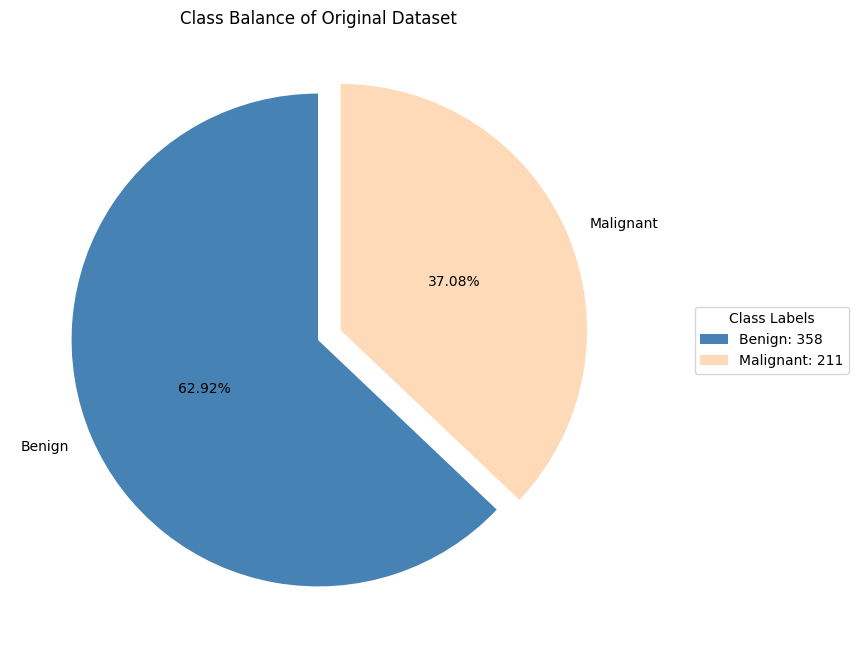

In [23]:
plt.figure(figsize=(8,8))
plt.pie(df['class'].value_counts(), labels=formatted_labels, startangle=90, explode=(0, 0.1), autopct='%1.2f%%', pctdistance=.5, colors=(colour_list))
plt.title("Class Balance of Original Dataset")
legend_labels = [f"{label}: {count}" for label, count in zip(formatted_labels, df['class'].value_counts())]
plt.legend(legend_labels, title="Diagnosis", loc="center left", bbox_to_anchor=(1.10, 0.5))
plt.show()

### Comments

The dataset exhibits a class imbalance, with a 63% majority (Benign) and 37% minority (Malignant). Although it is not considered an extreme imbalance, it would need to be addressed to avoid "unfairness between/among classes and poor generalization capability" (Wu.O, 2021).

## Descriptive Stats

In [27]:
# Min - Max Values Of Whole Dataset
temp_df = load_fresh_dataset().drop(['class', 'id'], axis=1)
max_values = temp_df.max()
min_values = temp_df.min()
min_vals_no_zeros = min_values[min_values != 0]

print(f"Max Value: {max_values.max()}")
print(f"Min Value: {min_vals_no_zeros.min()}")

Max Value: 4254.0
Min Value: 0.0008948


In [28]:
# Drops ID and Class From the dataset and splits into 3 separate dataframes (mean, error and worst features) making visualizations easier to comprehend.
col_list = np.array_split(temp_df.columns.tolist(), 3)

In [29]:
# Mean Features
mean_df = df[col_list[0]]
mean_df.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

,radius_mean,texture_mean,perimter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
mean,14.384936,19.280986,92.010459,654.704064,0.096376,0.104220,0.088799,0.048919,0.182799,0.062799
std,7.155929,4.299856,24.322495,352.102951,0.014074,0.052820,0.079720,0.038803,0.049779,0.007073
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.702500,16.170000,75.190000,420.300000,0.086390,0.064605,0.029560,0.020310,0.161900,0.057695
50%,13.375000,18.835000,86.240000,548.750000,0.095870,0.092525,0.061540,0.033500,0.179200,0.061540
75%,15.772500,21.785000,104.200000,782.675000,0.105350,0.130375,0.130700,0.074000,0.195675,0.066135
max,160.130000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,1.169700,0.097440


In [30]:
# Error Features
error_df = df[col_list[1]]
error_df.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error
mean,0.403911,1.214336,2.899306,40.237915,0.007034,0.025468,0.031895,0.011783,0.020535,0.003795
std,0.277612,0.550986,2.188340,45.491767,0.003009,0.017922,0.030213,0.006175,0.008272,0.002650
min,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895
25%,0.232350,0.832400,1.605000,17.850000,0.005161,0.013048,0.015062,0.007631,0.015128,0.002241
50%,0.319800,1.108000,2.288000,24.440000,0.006363,0.020435,0.025875,0.010910,0.018725,0.003187
75%,0.477850,1.472000,3.360000,45.075000,0.008120,0.032455,0.042118,0.014710,0.023397,0.004559
max,2.873000,4.885000,22.790000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840


In [31]:
# Worst Features
worst_df = df[col_list[2]]
worst_df.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
mean,16.275134,25.629170,107.235326,879.487986,0.135890,0.254019,0.272220,0.114233,0.289828,0.083974
std,4.847944,6.115881,33.609513,569.722315,0.090618,0.157306,0.208649,0.065489,0.061686,0.018101
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,13.030000,21.065000,84.135000,515.425000,0.116600,0.147200,0.115450,0.064330,0.250250,0.071460
50%,14.970000,25.370000,97.660000,685.550000,0.131300,0.211900,0.226700,0.099840,0.282050,0.080040
75%,18.655000,29.497500,125.250000,1065.000000,0.146000,0.337100,0.381900,0.161300,0.317825,0.092080
max,36.040000,49.540000,251.200000,4254.000000,2.226000,1.058000,1.252000,0.291000,0.663800,0.207500


### Comments:

There is a large fluctuation in numbers with the maximum value being 4254.0 and the minimum being 0.0008948. Numerical values will need normalizing, the "transformation of features in a common range so that greater numeric feature values cannot dominate the smaller numeric features values" (Singh & Singh, 2020).

Furthermore, the use 0s to display a missing value can be seen in the "min" row for concavity and concave_points_mean, error and worst features. Again, this will need addressing in future machine learning workflows


## Missing Values

### Missing Values (NaN)

In [60]:
df = load_fresh_dataset()

In [61]:
## Missing Values By Row - those that are NaN, non-numerical values.
missing_value_rows = (df[df.isna().any(axis=1)])
radius_pattern = []
total_values_missing = 0
for index, row in missing_value_rows.iterrows():
    missing_columns = row.index[row.isnull()]
    if len(missing_columns) > 0:
      total_values_missing += len(missing_columns)
      if len(missing_columns) == 3 and "radius_mean" in missing_columns and "radius_error" in missing_columns and 'radius_worst' in missing_columns:
          radius_pattern.append(index)
radius_num_string = ', '.join(map(str, radius_pattern))

### Missing Values (0)

In [66]:
## Missing Values By Row - those that are = 0.
zero_value_rows = (df[(df == 0).any(axis=1)])
concave_pattern = []
total_zeros_present = 0
for index, row in zero_value_rows.iterrows():
    zero_columns = row.index[row.eq(0)]
    if len(zero_columns) > 0:
      total_zeros_present += len(zero_columns)
      if "concavity_mean" in zero_columns and "concave_points_mean" in zero_columns and "concavity_error" in zero_columns and "concave_points_error" in zero_columns and "concavity_worst" in zero_columns and "concave_points_worst" in zero_columns:
          concave_pattern.append(index)
zero_nums_string = ', '.join(map(str, concave_pattern))

### Total Missing

In [88]:
temp_df = load_fresh_dataset()
temp_df.replace(0, np.nan, inplace=True)

In [90]:
missing_values_per_row = temp_df.isnull().sum(axis=1)
plot_missing_nums = pd.DataFrame(missing_values_per_row,columns=["sum"])
filtered_df = plot_missing_nums[plot_missing_nums['sum'] != 0]

In [91]:
total_missing_per_col = zero_counts_per_column = (df == 0).sum() + df.isnull().sum()
print(f"Total Missing Per Column:\n{total_missing_per_col}")

Total Missing Per Column:
id                          1
radius_mean                19
texture_mean                1
perimter_mean               2
area_mean                   3
smoothness_mean             2
compactness_mean            3
concavity_mean             13
concave_points_mean        13
symmetry_mean               3
fractal_dimension_mean      2
radius_error               18
texture_error               2
perimeter_error             1
area_error                  2
smoothness_error            3
compactness_error           1
concavity_error            14
concave_points_error       15
symmetry_error              1
fractal_dimension_error     2
radius_worst               18
texture_worst               3
perimeter_worst             2
area_worst                  3
smoothness_worst            0
compactness_worst           4
concavity_worst            15
concave_points_worst       16
symmetry_worst              3
fractal_dimension_worst     4
class                       0
dtype: int64


In [92]:
print(f"Total data points missing: {total_zeros_present + total_values_missing}\nRows containing missing values: {len(filtered_df)}")

Total datapoints missing: 189
Rows containing missing values: 38


### Missing Value Patterns

In [94]:
# NaNs per row and radius pattern
print(f'There are {len(radius_pattern)} rows which only have radius_mean, radius_error, and radius_worst missing')
print(f'Rows: {radius_num_string}')

There are 16 rows which only have radius_mean, radius_error, and radius_worst missing
Rows: 10, 21, 27, 44, 67, 90, 130, 226, 256, 267, 302, 349, 397, 451, 507, 552


In [95]:
# Total 0s present and concave pattern
print(f"There are {len(concave_pattern)} rows which all contain 0 for the concavity & concave_points mean, error and worst features.")
print(f"Rows: {zero_nums_string}")

There are 13 rows which all contain 0 for the concavity & concave_points mean, error and worst features.
Rows: 101, 140, 174, 175, 192, 314, 391, 473, 538, 550, 557, 561, 568


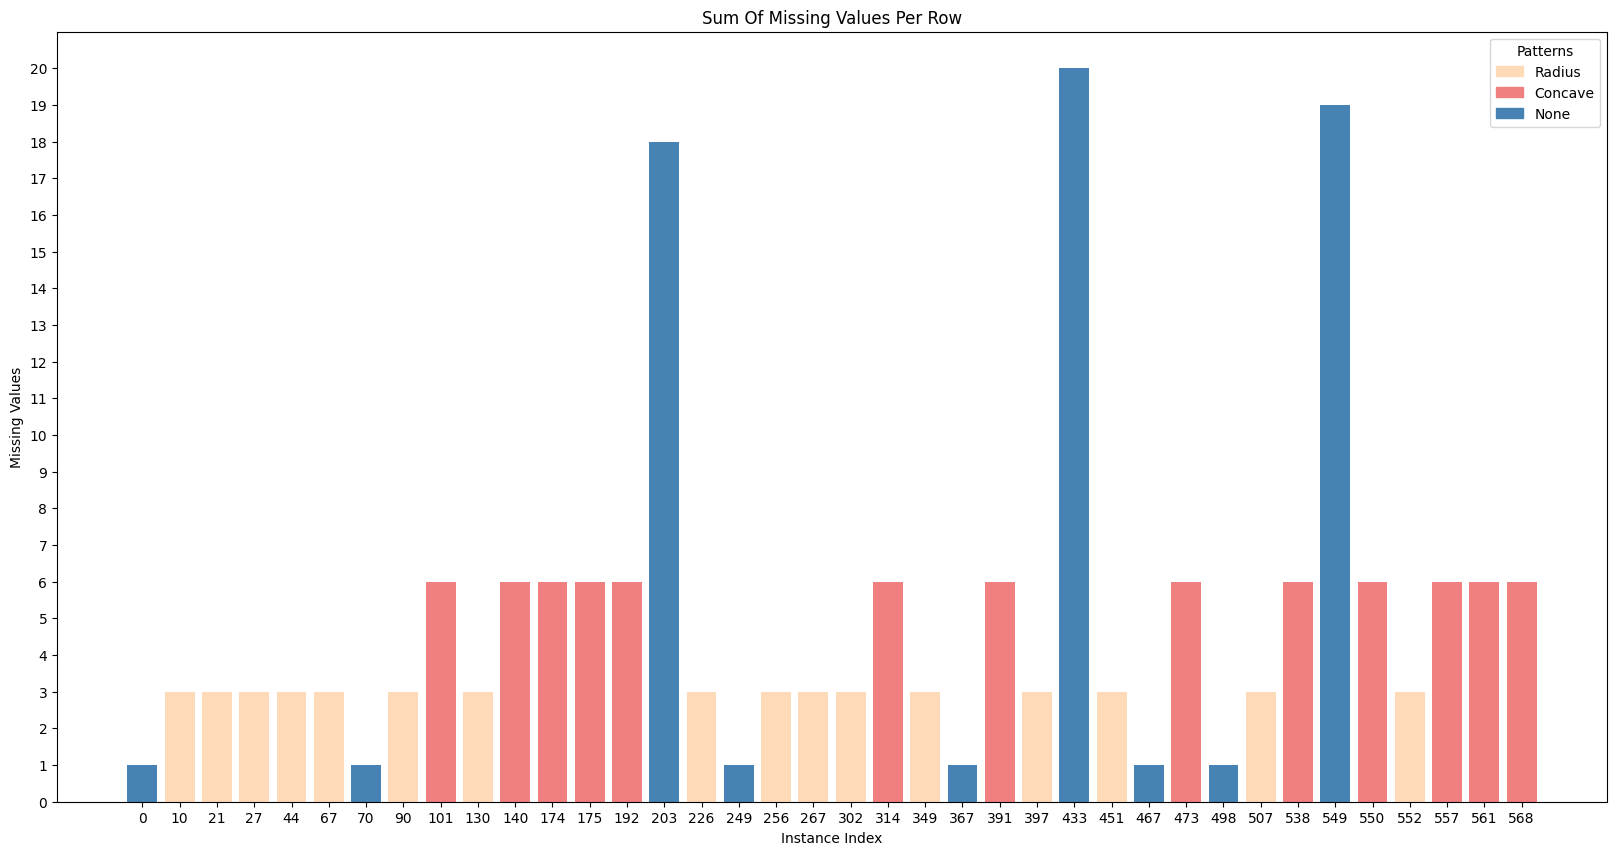

In [96]:
plt.figure(figsize=(20,10))
x_values = np.arange(len(filtered_df))
colors = ['peachpuff' if index in radius_pattern else ('lightcoral' if index in concave_pattern else 'steelblue') for index in filtered_df.index]
labels = ['Radius' if index in radius_pattern else ('Concave' if index in concave_pattern else 'None') for index in filtered_df.index]

plt.bar(x_values, filtered_df['sum'], color=colors)

legend_elements = [Patch(color='peachpuff', label='Radius'),
                   Patch(color='lightcoral', label='Concave'),
                   Patch(color='steelblue', label='None')]

plt.legend(handles=legend_elements, title='Patterns', loc='upper right')

plt.xlabel("Instance Index")
plt.ylabel("Missing Values")
plt.title("Sum Of Missing Values Per Row")
plt.xticks(x_values, filtered_df.index)
plt.yticks(range(21))
plt.show()

### Comments

Several features are missing in distinct patterns.
  
  *   Firstly the radius_mean, radius_error, and radius_worst are missing for 16 records. The radius_error and radius_worst would be reliant on the radius_mean being taken as such it can be said that these values are not missing at random.

  * Secondly, the concavity_mean, concavity_error, concavity_worst, concave_points_mean, concave_points_error and concave_points_worst are all missing for 13 records. Again indicating a pattern as the error and worst would always depend on the mean (first measurement) being taken.


## Duplicates

In [98]:
duplicates = df.duplicated()
print(f'There are {len(df)} instances within the dataset, of which {duplicates.sum()} are duplicated.')

There are 569 instances within the dataset, of which 0 are duplicated.


## Boxplots By Diagnosis

In [109]:
def show_boxplots(group, group_name):
  ''' Displays a group of boxplot '''
  fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30,10))
  axes = axes.flatten()
  for i in range(len(group)):
    sns.boxplot(x='class', y=group[i], data=df, ax=axes[i], palette=colour_list, hue='class', order=['B', 'M'])
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(formatted_labels)
    axes[i].set_xlabel("Diagnosis")
  fig.suptitle(f"{group_name} Features by Diagnosis", fontsize=18)
  plt.subplots_adjust(top=0.95)
  plt.show()

# Splits Dataset into the 3 feature groups, mean error and worst
df_no_id_or_class = df.drop(['id', 'class'], axis=1)
col_list = np.array_split(df_no_id_or_class.columns.tolist(), 3)
mean_list = col_list[0]
error_list = col_list[1]
worst_list = col_list[2]

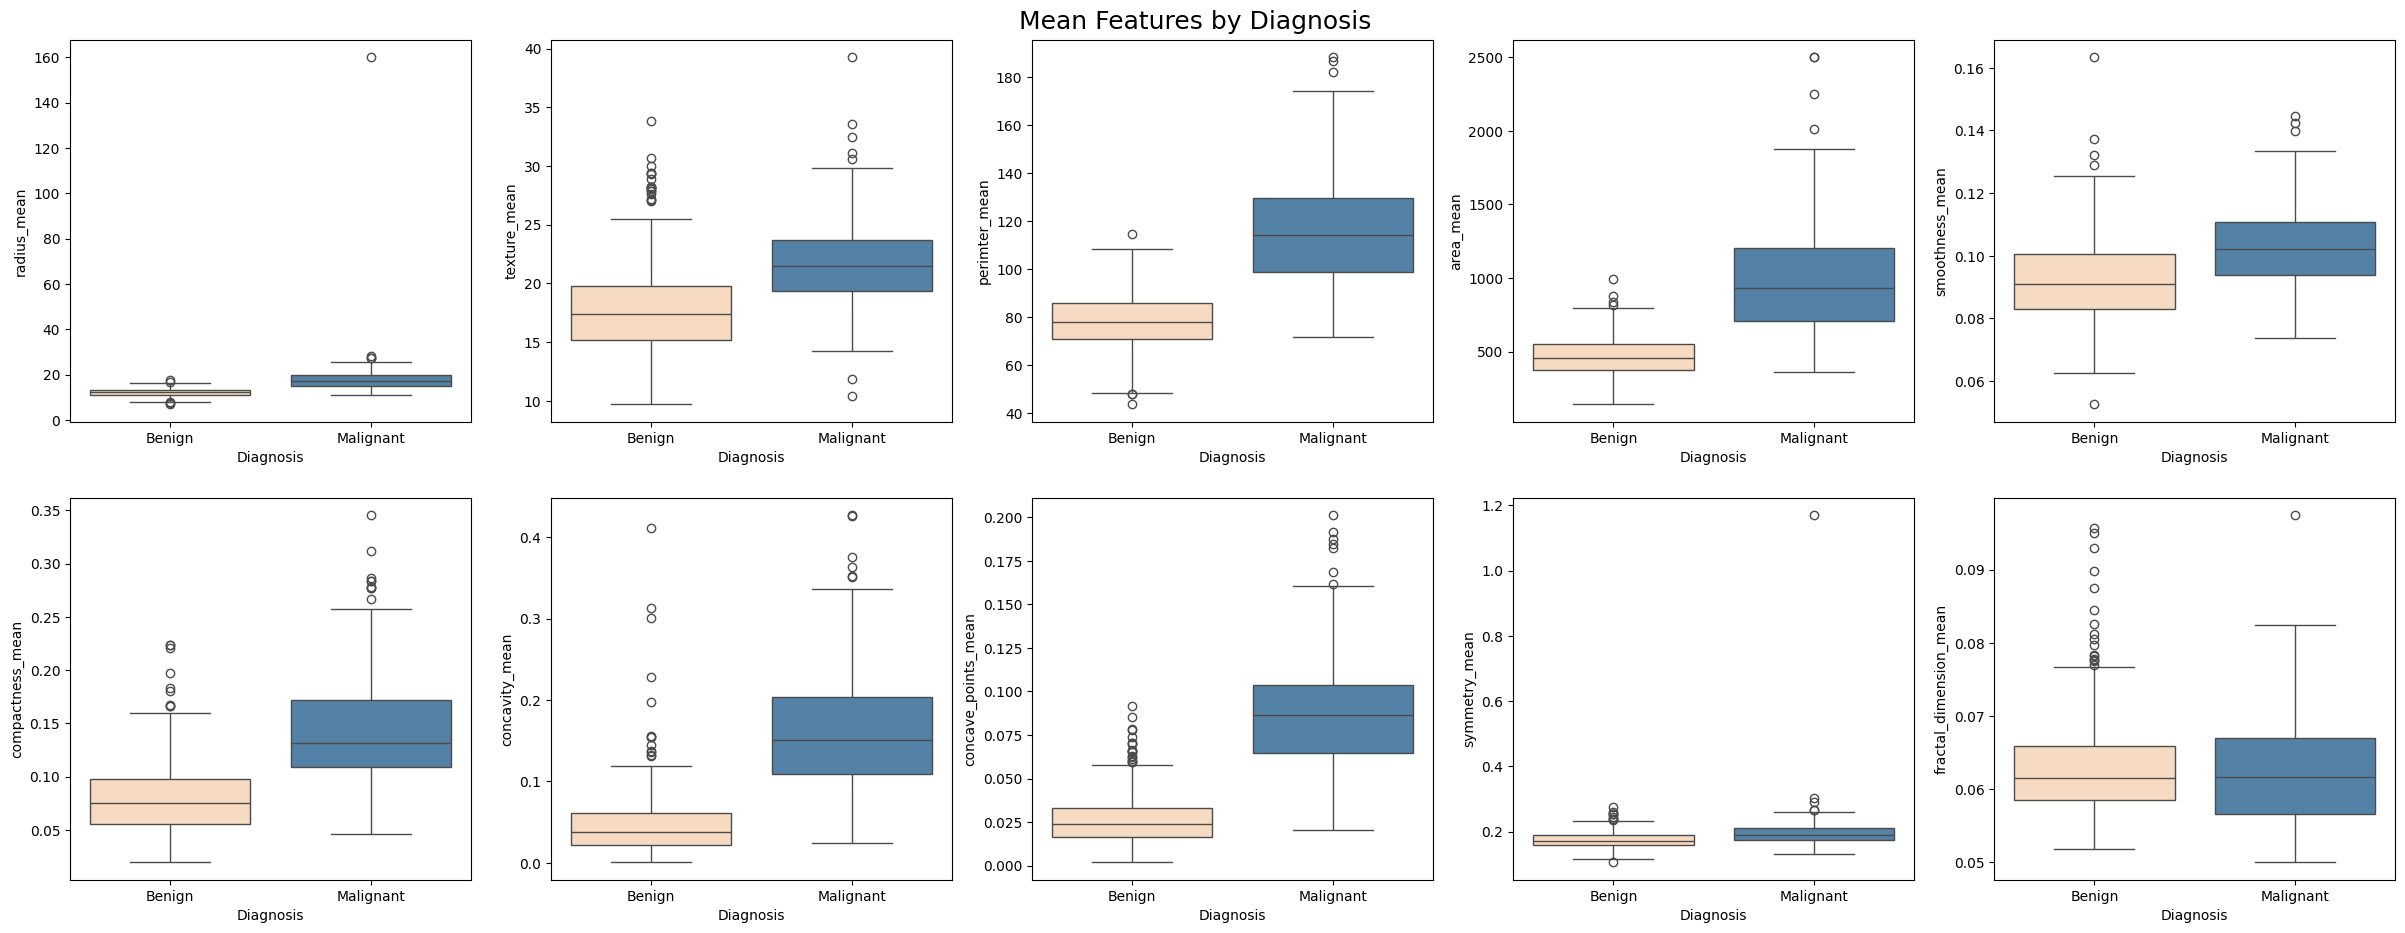

In [110]:
# Mean Features by Diagnosis
show_boxplots(mean_list, "Mean")

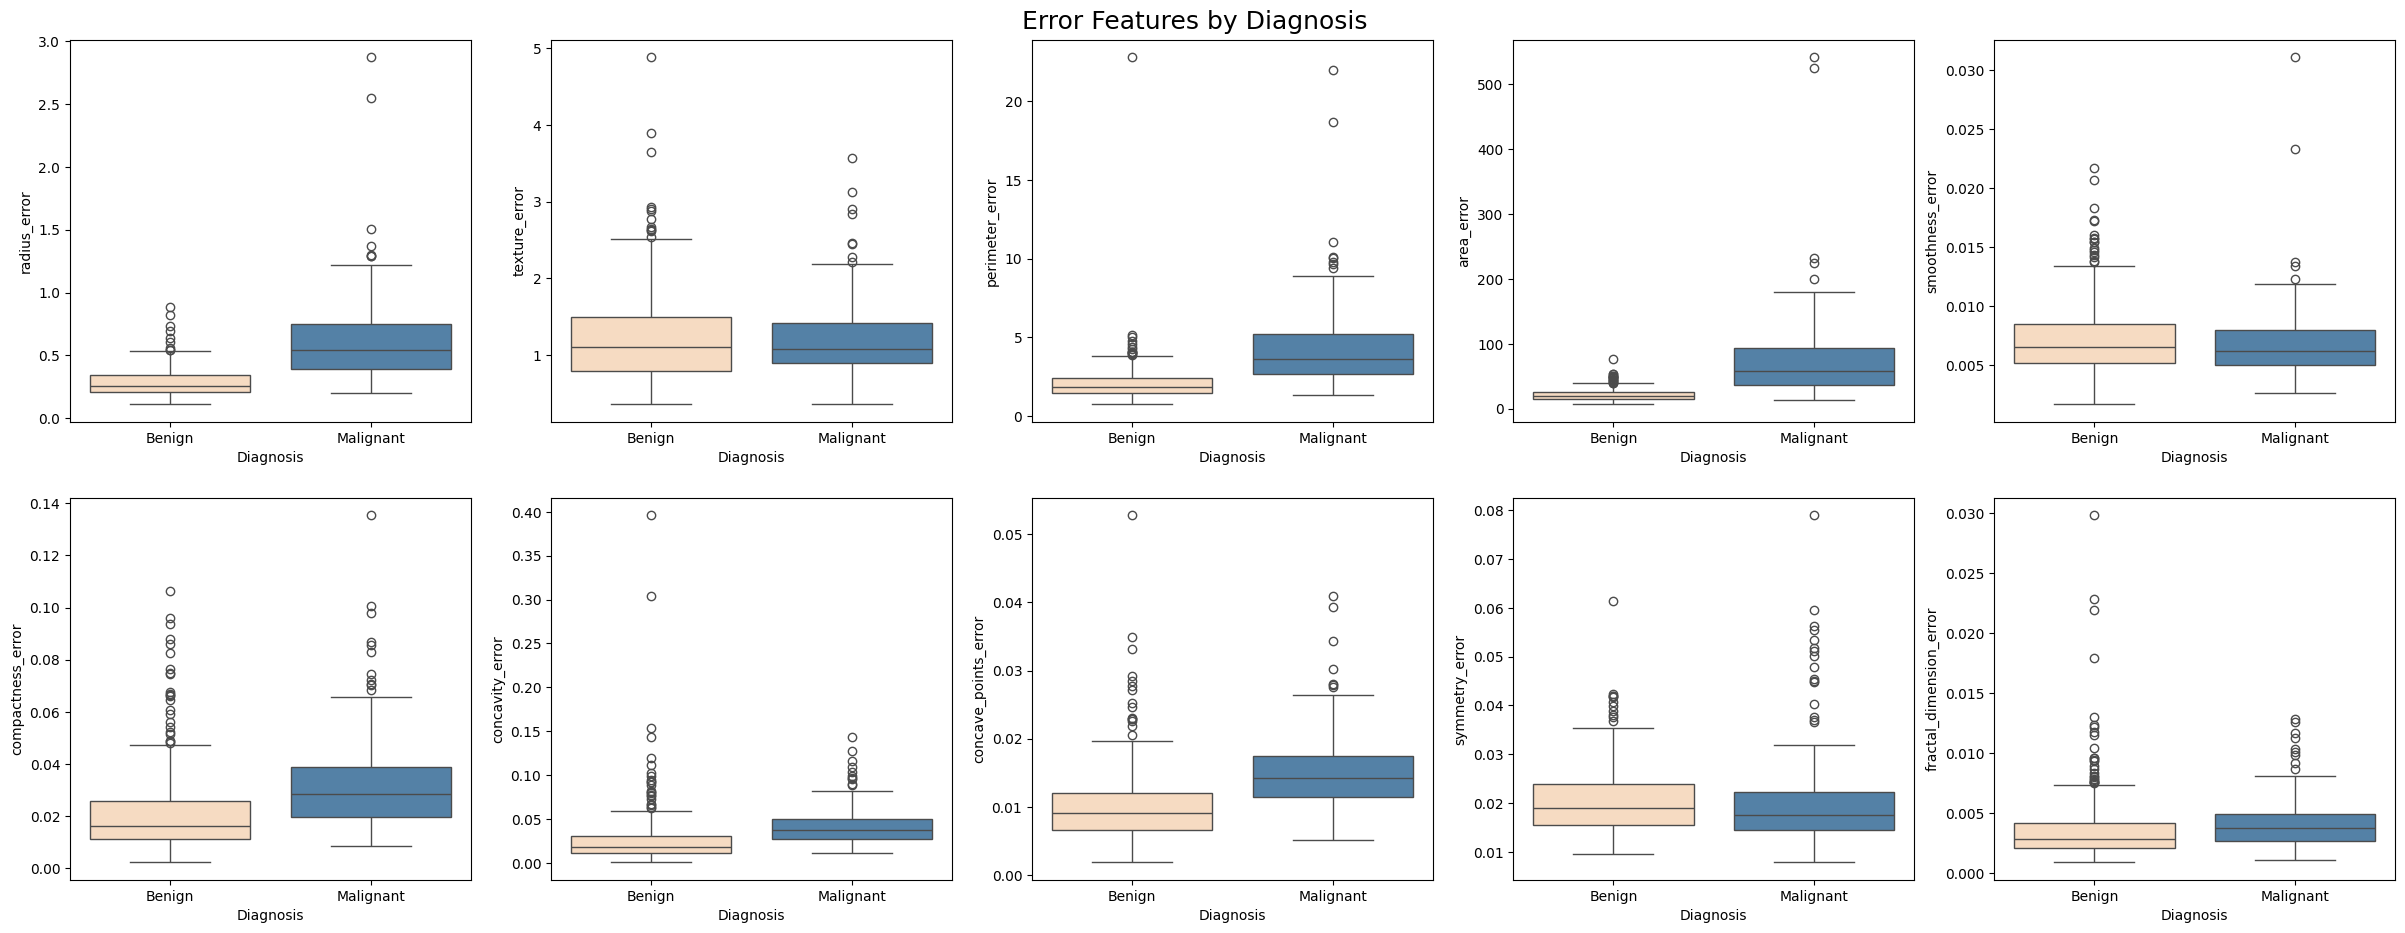

In [111]:
# Error Features by Class
show_boxplots(error_list,"Error")

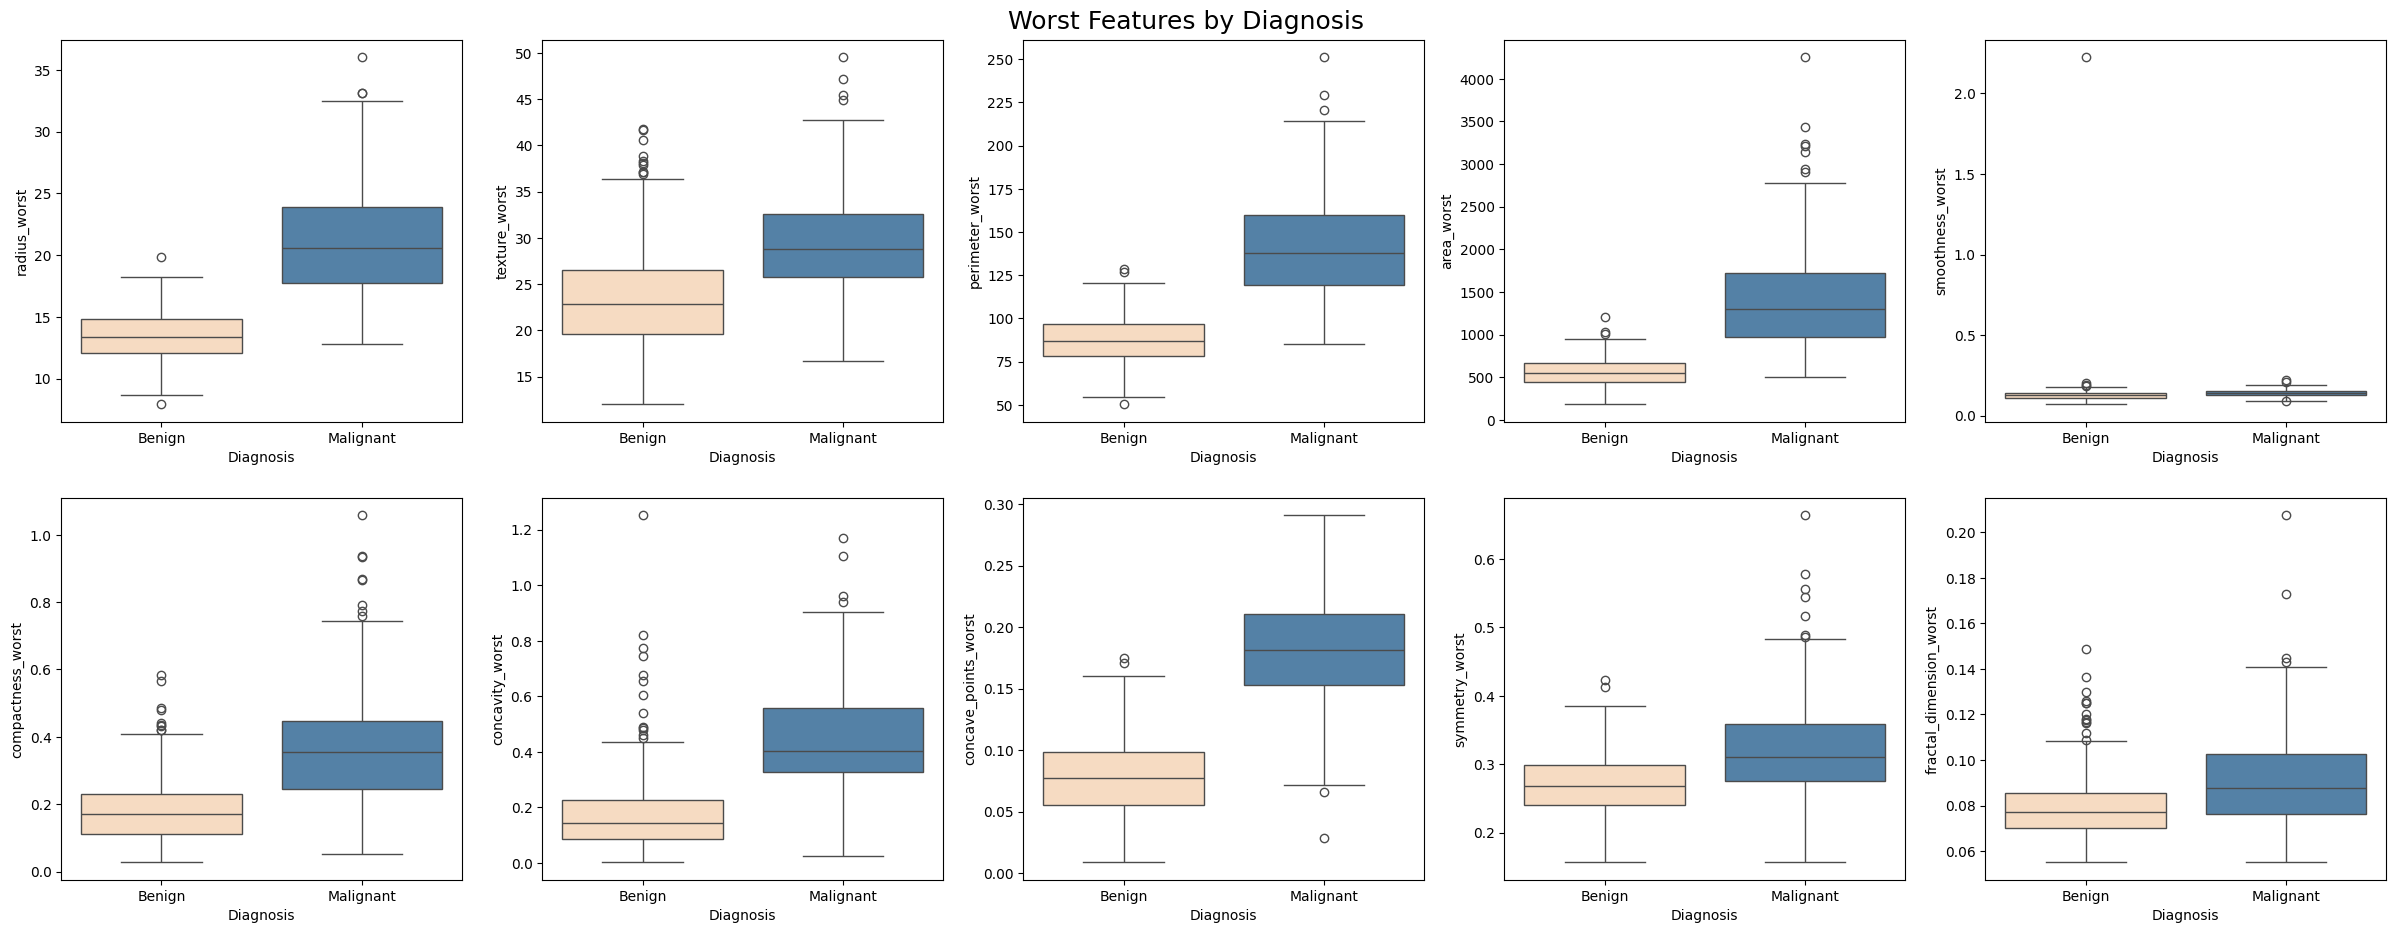

In [112]:
# Worst Features by Class
show_boxplots(worst_list, "Worst")

### Comments:

*   Some distinct significant differences between diagnosis and features in terms of the overall mean.

*   Worst features exhibit an enormous difference for features such as radius, area and concave_points worst, where the minimum value of the Malignant diagnosis is in line or higher than the mean of the Benign Class. This highlights some potentially important features.

*   Large number of statistical outliers or noise, while the dataset exhibits a large number of noise/ statistical outliers these will not need to be addressed. Solely because more extreme values tend to indicate a Malignant diagnosis so removing/handling them could create a bias towards a Benign diagnosis.

*   Correlation analysis will be performed next to investigate if any of the features showing a clear distinction between Diagnosis are indeed correlated to the final diagnosis.

## Correlation Analysis

In [113]:
df = load_fresh_dataset()
class_map = {"B":0,"M":1}
df['class'] = df['class'].map(class_map)

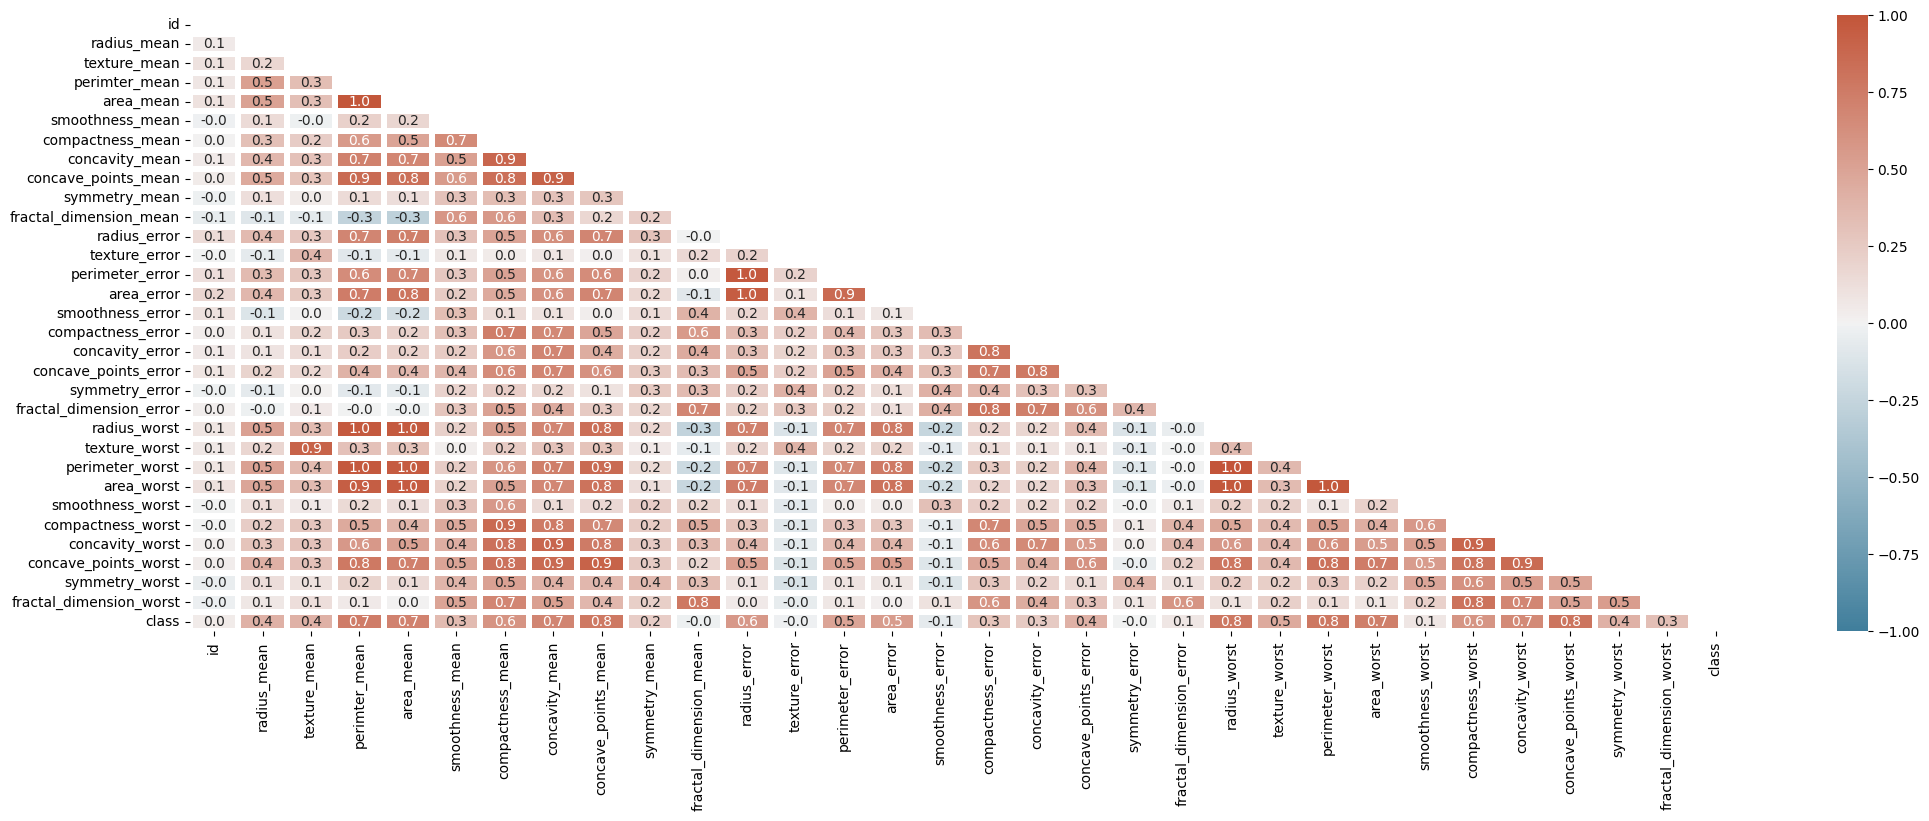

In [114]:
# Whole Dataset Correlation
corr_matrix = df.corr()
matrix_hide = np.triu(corr_matrix)
fig, ax = plt.subplots(figsize=(25,8))
cmap_colours = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap_colours, linewidths=4, fmt=".1f", mask=matrix_hide, vmin=-1, vmax=1, ax=ax)
plt.show()

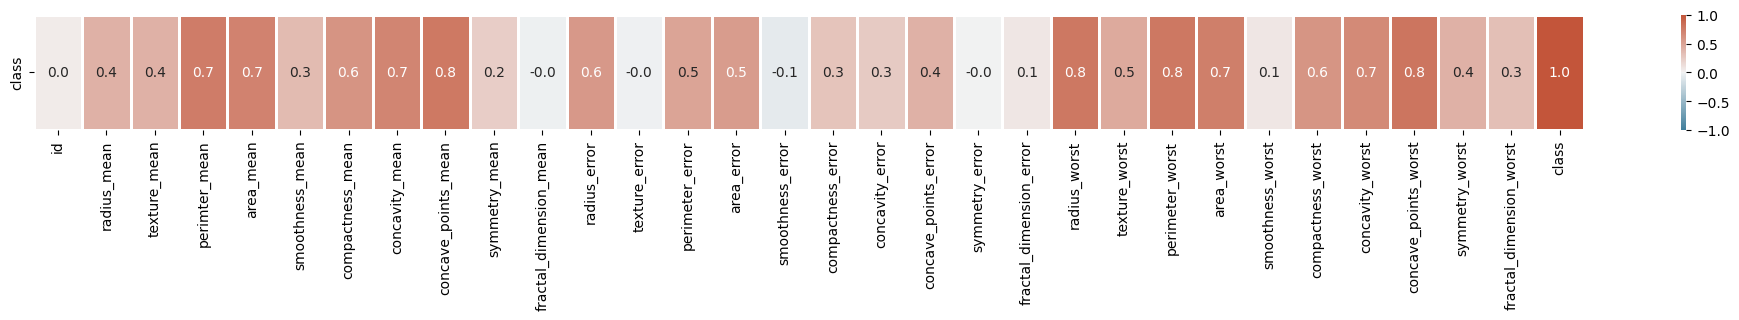

In [115]:
# Correlation With Class
corr = df.corrwith(df['class'])
cor_df = pd.DataFrame(corr, columns=['class'])
fig, ax = plt.subplots(figsize=(25,1.5))
sns.heatmap(cor_df.transpose(), annot=True, cmap=corr_colours, fmt=".1f", vmin=-1, vmax=1, xticklabels=True, yticklabels=True, ax=ax, linewidth=1)
plt.show()

## Basic Feature Importance

In [117]:
def drop_missing_vals():
  ''' Returns original Dataset with missing value rows dropped'''
  df = pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')
  class_map = {"B":0,"M":1}
  df['class'] = df['class'].map(class_map)
  cleaned = df.dropna()
  return cleaned

In [118]:
# Format Dataset
df = drop_missing_vals()
X = df.iloc[:,:len(df.columns)-1]
y = df.iloc[:,len(df.columns)-1]

In [119]:
# Model
model = RandomForestClassifier()

# Train
model.fit(X, y)

# Feature Importance Scores
feature_importance = model.feature_importances_
feature_importance_tuples = list(zip(X.columns.tolist(), feature_importance))
feature_importance_tuples.sort(key=lambda x: x[1], reverse=False)
sorted_feature_names, sorted_feature_importance = zip(*feature_importance_tuples)

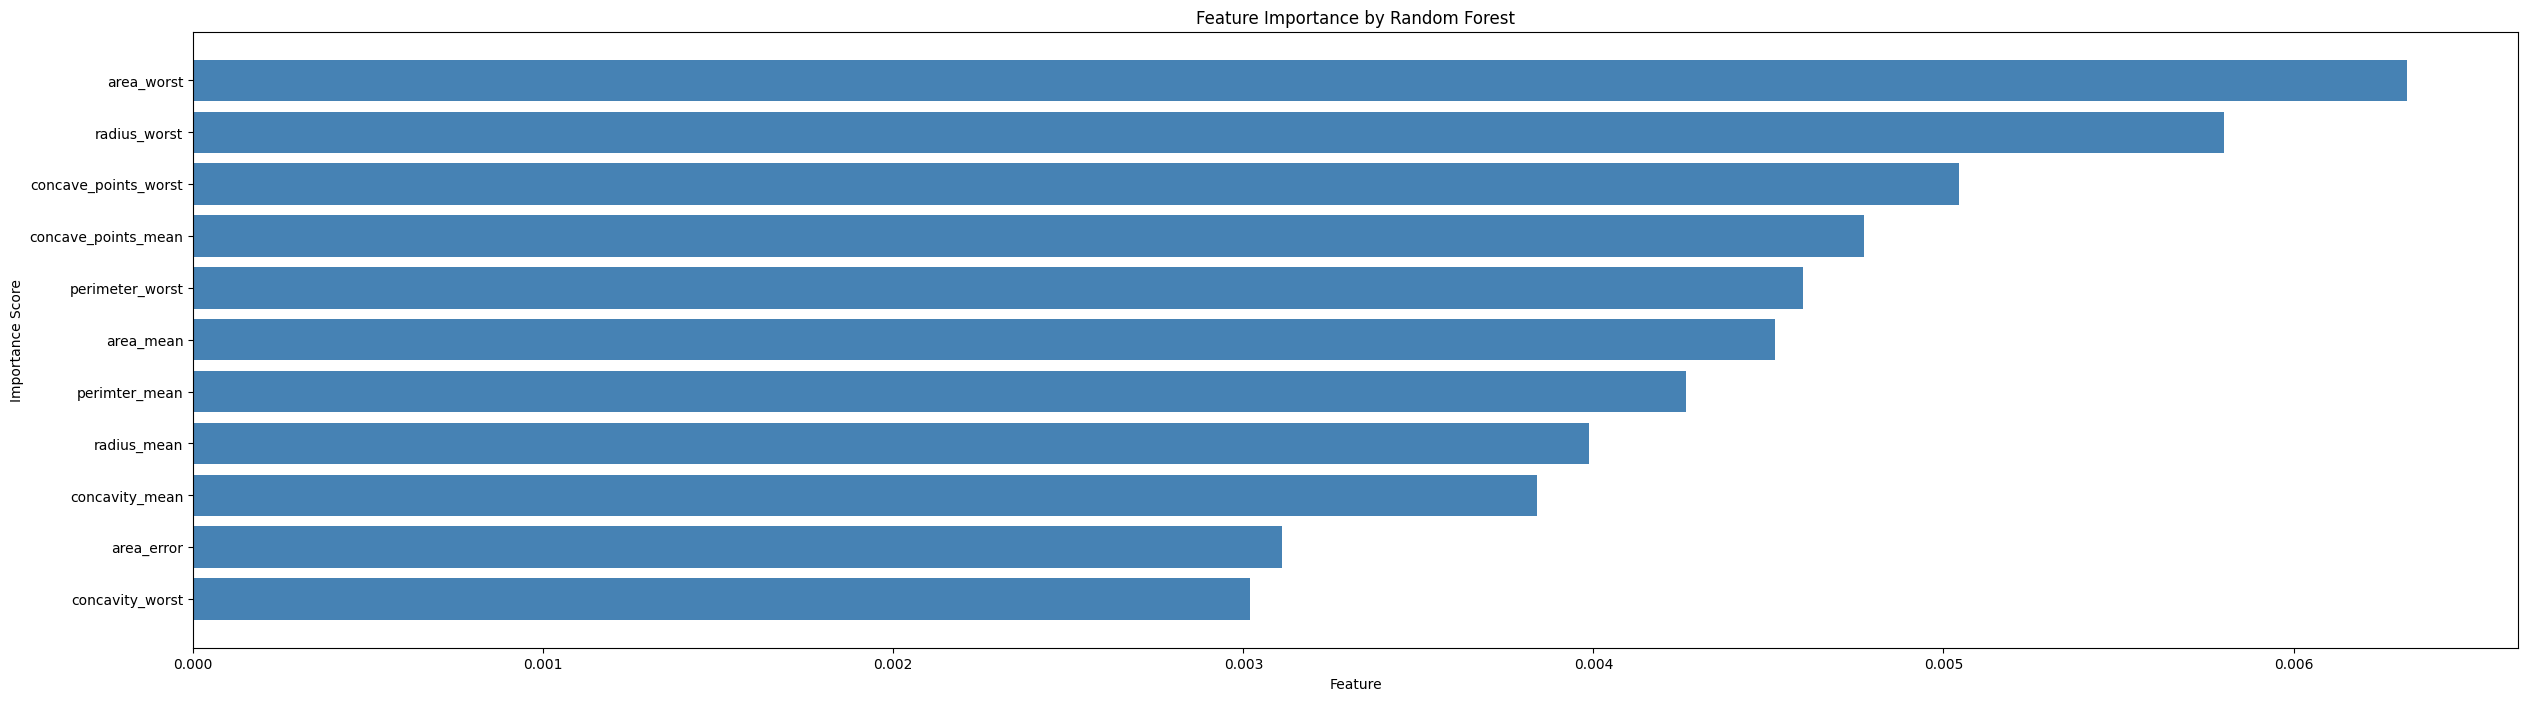

In [120]:
# Feature Importance Rankings Per Column
plt.figure(figsize=(30, 8))
plt.barh(range(11), sorted_feature_importance[:11], tick_label=sorted_feature_names[20:], color='steelblue')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance by Random Forest')
plt.show()

### Comments

The random forest has chosen features such as area_worst, radius_worst and concave_points_worst to play a more significant role in whether a tumour will be benign or malignant. This is inline with the previously created boxplots where these features showed a clear disparity in metrics between the two diagnosis classes